# Tiantanic项目分析

观察数据，清理数据

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df_data_orign = pd.read_csv('titanic-data.csv')
df_data_orign.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_data_orign.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_data_orign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


判断,姓名无关，ID无关，登船地点也无关，去除,亲属数量可以合并，船舱数量缺失太多，去除，因变量为Survived

In [6]:
df_data_drop = df_data_orign.drop(['PassengerId', 'Name', 'Embarked','Ticket','Cabin'], axis = 1)
df_data_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.8+ KB


处理缺失值，年龄缺失值太多，用年龄中位数填充缺失值

In [7]:
df_data_drop['Age'] = df_data_drop['Age'].fillna(df_data_drop['Age'].median())
df_data_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.8+ KB


sibsp 和 parch 可以合并为亲属数量

In [8]:
df_data = df_data_drop
df_data['Relatives'] = df_data_drop['SibSp'] + df_data_drop['Parch']
df_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Relatives
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.904602
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,1.613459
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000


对每个特征的数据，进行生存率的分析

In [9]:
#对某组特征，计算该特征人群的生存率
def get_survival_rate(data, feature):
    data_feature = data.groupby(feature)
    survival_rate = (data_feature.sum()/data_feature.count())['Survived']
    return survival_rate

        Survived
Sex             
female  0.742038
male    0.188908


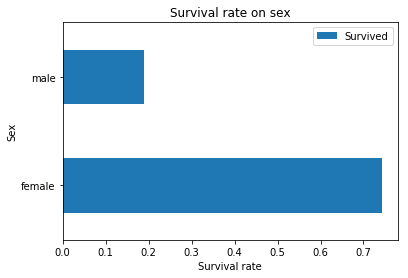

In [28]:
survival_rate_on_sex = get_survival_rate(df_data, 'Sex')
print survival_rate_on_sex.to_frame()
survival_rate_on_sex.to_frame().plot(kind = 'barh')
plt.xlabel('Survival rate')
plt.title('Survival rate on sex')
plt.show()

          Survived
Age               
(0, 10]   0.593750
(10, 20]  0.382609
(20, 30]  0.334152
(30, 40]  0.445161
(40, 50]  0.383721
(50, 60]  0.404762
(60, 70]  0.235294
(70, 80]  0.200000


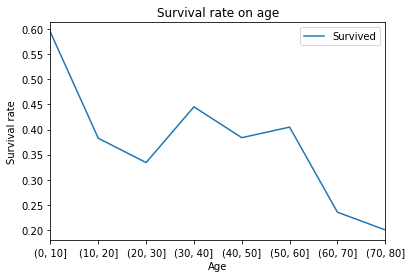

In [29]:
#df_data_age = df_data
ages = np.arange(0,81,10)
cut_age = pd.cut(df_data.Age, ages)
survival_rate_on_age = get_survival_rate(df_data, cut_age)
print survival_rate_on_age.to_frame()
survival_rate_on_age.to_frame().plot()
plt.ylabel('Survival rate')
plt.title('Survival rate on age')
plt.show()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


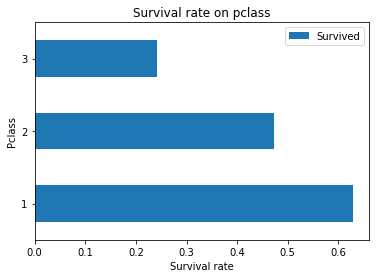

In [30]:
survival_rate_on_pclass = get_survival_rate(df_data, 'Pclass')
print survival_rate_on_pclass
survival_rate_on_pclass.to_frame().plot(kind = 'barh')
plt.xlabel('Survival rate')
plt.title('Survival rate on pclass')
plt.show()

Fare
(0, 50]       0.324022
(50, 100]     0.654206
(100, 150]    0.791667
(150, 200]    0.666667
(200, 250]    0.636364
Name: Survived, dtype: float64


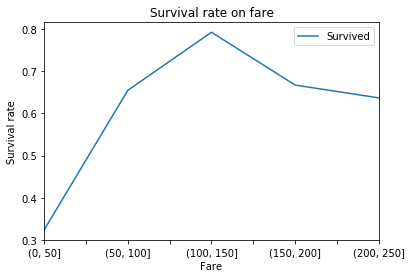

In [33]:
fares = np.arange(0,300,50)
cut_fare = pd.cut(df_data.Fare, fares)
survival_rate_on_fare = get_survival_rate(df_data, cut_fare)
print survival_rate_on_fare
survival_rate_on_fare.to_frame().plot()
plt.ylabel('Survival rate')
plt.title('Survival rate on fare')
plt.show()

           Survived
Relatives          
0          0.303538
1          0.552795
2          0.578431
3          0.724138
4          0.200000
5          0.136364
6          0.333333
7          0.000000
10         0.000000


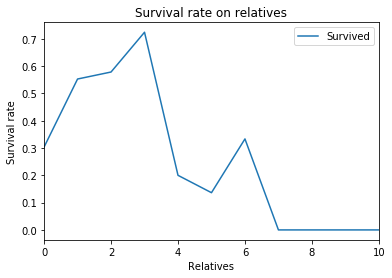

In [32]:
survival_rate_on_relatives = get_survival_rate(df_data, 'Relatives')
print survival_rate_on_relatives.to_frame()
survival_rate_on_relatives.to_frame().plot()
plt.ylabel('Survival rate')
plt.title('Survival rate on relatives')
plt.show()

In [16]:
#二维数据分析
survival_rate_sex_pclass = get_survival_rate(df_data, ['Sex', 'Pclass'])
print survival_rate_sex_pclass.to_frame()

               Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447


In [21]:
#对二维数据进行比例分析
df_data.groupby('Pclass')['Sex'].count()

Pclass
1    216
2    184
3    491
Name: Sex, dtype: int64

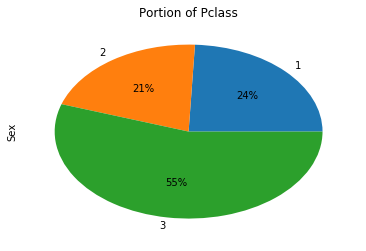

In [24]:
df_data.groupby('Pclass')['Sex'].count().plot(kind = 'pie', autopct = '%.0f%%')
plt.title('Portion of Pclass')
plt.show()

In [23]:
df_data.groupby('Sex')['Pclass'].count()

Sex
female    314
male      577
Name: Pclass, dtype: int64

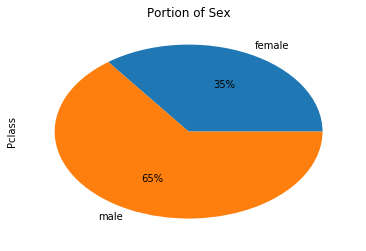

In [27]:
df_data.groupby('Sex')['Pclass'].count().plot(kind = 'pie', autopct = '%.0f%%')
plt.title('Portion of Sex')
plt.show()

               Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447


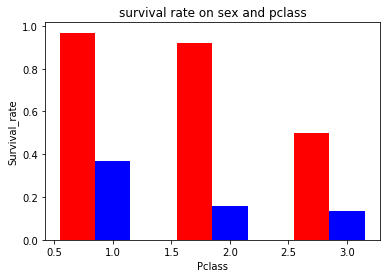

In [15]:
x = np.array([1,2,3])
plt.bar(x,survival_rate_sex_pclass.male,0.3 ,color = 'b')
plt.bar(x-0.3,survival_rate_sex_pclass.female,0.3, color = 'r')
plt.xlabel('Pclass')
plt.ylabel('Survival_rate')
plt.title('survival rate on sex and pclass')
plt.show()